Data loaded successfully from: /content/red_wine.csv


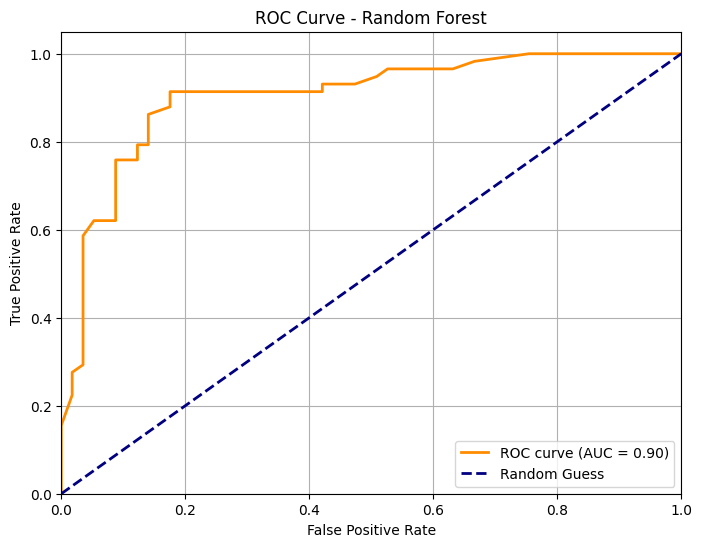

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset (already in /content/ from previous steps)
file_path = "/content/red_wine.csv"

try:
    red_wine = pd.read_csv(file_path)
    print("Data loaded successfully from:", file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    raise
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Prepare features (X) and target (y)
X = red_wine[['citric acid', 'sulphates', 'alcohol']]
y = red_wine['type'].map({'low': 0, 'high': 1})  # Convert to binary (0 = low, 1 = high)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = rf.predict_proba(X_test)[:, 1]  # Probability of the positive class (1 = high)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot
plt.savefig('roc_curve_rf.png')
plt.show()

# Download the plot
files.download('roc_curve_rf.png')